In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Train Dataset

In [2]:
df_train=pd.read_csv("flighttarin.csv")

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


From the above dataset,
1. There are 10683 rows and 11 columns.
2. As we have to predict the price it is a regression column.
3. All other columns like date of journey, source, destination ets are the input variables.
4. As the data in columns like arrival time, duration time is tough to read we will create hours and minutes columns from these 2 columns.

In [29]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are missing values in the columns like route and total_stops

In [30]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [32]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Univariant, Bivariant, Multivariant Dataset

<AxesSubplot:xlabel='Price', ylabel='Density'>

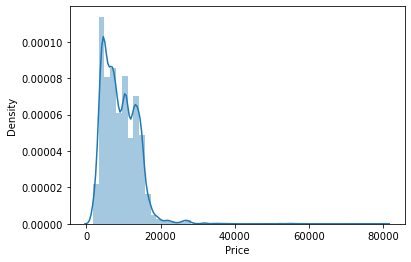

In [4]:
sns.distplot(df_train['Price'])

From the above plot we can say that the data is right tailed i.e slightly skewed.

<AxesSubplot:xlabel='Airline', ylabel='count'>

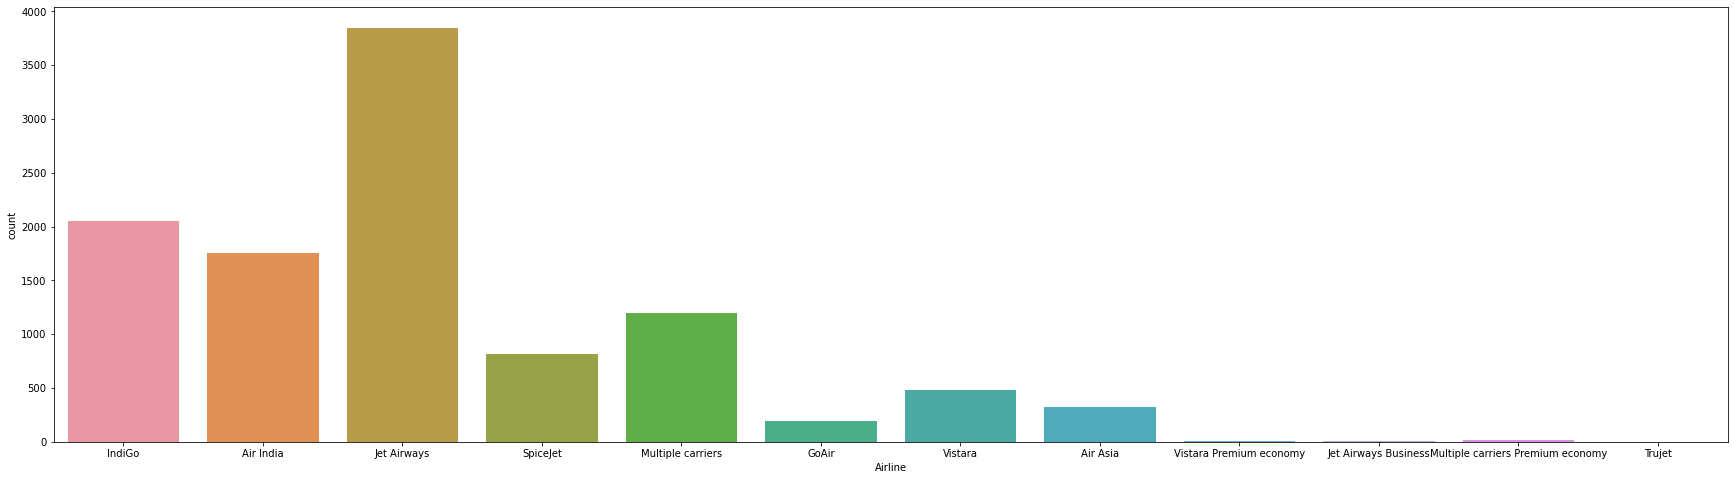

In [18]:
plt.figure(figsize=(30,8))
sns.countplot(df_train['Airline'])

We have around 11 airlines and highest count is of jet airways.

<AxesSubplot:xlabel='Source', ylabel='Price'>

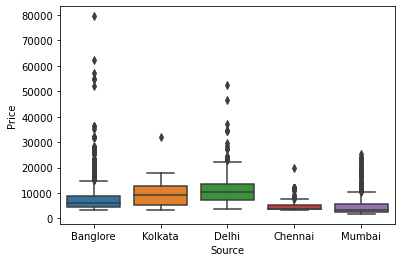

In [23]:
sns.boxplot(df_train['Source'],df_train['Price'])

Flights with the source as bangalore has highest price.

<AxesSubplot:xlabel='Source', ylabel='count'>

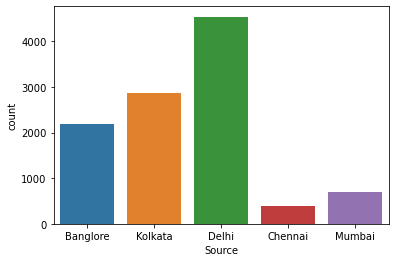

In [24]:
sns.countplot(df_train['Source'])

Most of the flights are with source destinations delhi.

<AxesSubplot:xlabel='Destination', ylabel='count'>

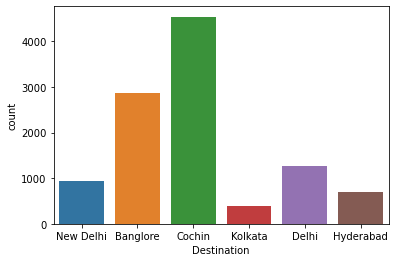

In [26]:
sns.countplot(df_train['Destination'])

Destination with cochin has the highest count.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

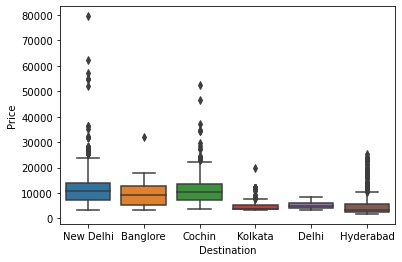

In [27]:
sns.boxplot(df_train['Destination'],df_train['Price'])

destinations with new delhi are the costliest ones whereas the hydrabad are the least ones.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

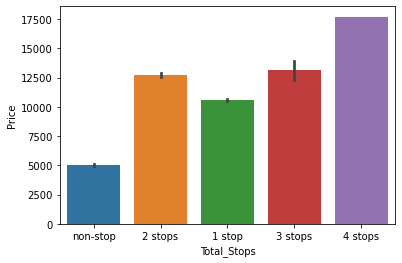

In [28]:
sns.barplot(df_train['Total_Stops'],df_train['Price'])

Tickets with the 4 stops are the costliest ones where as the tickets with no stops are the least in price.

# Importing the Test Dataset

In [134]:
df_test=pd.read_csv("flighttest.csv")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


From the above dataset we can see that,
1. there are 2671 rows and 10 cloumns.
2. it is a test dataset.
3. we have to pridict the price as per the given input varaibles.

In [139]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

we have no missing values in the test dataset.

# Data Cleaning/Preprocessing of Test Dataset

In [140]:
#extracting days, months, years
df_test['Day'],df_test['Month'],df_test['Year'] = df_test['Date_of_Journey'].str.split('/',3).str
df_test.drop('Date_of_Journey',axis=1,inplace=True)
#extracting dep hour and dep minutes
df_test['Dep_h'],df_test['Dep_m']=df_test['Dep_Time'].str.split(':',2).str
df_test.drop('Dep_Time',axis=1,inplace=True)
# Extracting Hours
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
# Extracting Minutes
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)
#replacing the 'h' with ':' and 'm' with ' '
df_test['duration'] = df_test['Duration'].str.replace('h',':').str.replace('m','')
#extracting the duration hour and minutes
df_test['Dur_h'],df_test['Dur_m']=df_test['duration'].str.split(':',2).str
df_test.drop('duration',axis=1,inplace=True)
df_test.drop('Duration',axis=1,inplace=True)
df_test.drop('Route',axis=1,inplace=True)
#droping all thoes columns from which we have created furtur variables.

In [141]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,06,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,2019,06,20,10,20,4,
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,05,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,05,2019,08,00,21,0,13,
4,Air Asia,Banglore,Delhi,non-stop,No info,24,06,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,No info,6,06,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,No info,27,03,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,No info,6,03,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,No info,6,03,2019,04,00,19,15,15,15


# Label Encoding of Test dataset

In [142]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #converting the categorial data into numeric data
name=['Airline','Source','Destination','Total_Stops','Additional_Info']
for val in name:
    df_test[val]=le.fit_transform(df_test[val].astype(str))


In [143]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,4,2,1,0,5,6,06,2019,17,30,4,25,10,55
1,3,3,0,0,5,12,05,2019,06,20,10,20,4,
2,4,2,1,0,3,21,05,2019,19,15,19,0,23,45
3,6,2,1,0,5,21,05,2019,08,00,21,0,13,
4,0,0,2,4,5,24,06,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,5,6,06,2019,20,30,20,25,23,55
2667,3,3,0,4,5,27,03,2019,14,20,16,55,2,35
2668,4,2,1,0,5,6,03,2019,21,50,4,25,6,35
2669,1,2,1,0,5,6,03,2019,04,00,19,15,15,15


# Missing values in test dataset

In [144]:
df_test['Dur_m'].replace(r'',np.NaN,inplace=True)

As we have created duration minute from the duration column so it has some nan values.

In [145]:
df_test['Dur_m'].fillna(0,inplace=True)

we will be replacing thoes nan values with 0.

# Typecasting

In [146]:
df_test['Day']=df_test['Day'].astype(int)
df_test['Month']=df_test['Month'].astype(int)
df_test['Year']=df_test['Year'].astype(int)
df_test['Dep_h']=df_test['Dep_h'].astype(int)
df_test['Dep_m']=df_test['Dep_m'].astype(int)
df_test['Dur_h']=df_test['Dur_h'].astype(int)
df_test['Dur_m']=df_test['Dur_m'].astype(int)

coverting all the object data into numeric data.

In [195]:
df_test.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int32
Additional_Info    int32
Day                int32
Month              int32
Year               int32
Dep_h              int32
Dep_m              int32
Arrival_hour       int64
Arrival_min        int64
Dur_h              int32
Dur_m              int32
dtype: object

# Creating the independent(X) dataset.

In [196]:
x1=df_test  #independent variable set
x1


,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,4,2,1,0,5,6,6,2019,17,30,4,25,10,55
1,3,3,0,0,5,12,5,2019,6,20,10,20,4,0
2,4,2,1,0,3,21,5,2019,19,15,19,0,23,45
3,6,2,1,0,5,21,5,2019,8,0,21,0,13,0
4,0,0,2,4,5,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,5,6,6,2019,20,30,20,25,23,55
2667,3,3,0,4,5,27,3,2019,14,20,16,55,2,35
2668,4,2,1,0,5,6,3,2019,21,50,4,25,6,35
2669,1,2,1,0,5,6,3,2019,4,0,19,15,15,15


# Performing Power Transformtaion/Scaling of test dataset

In [198]:
from sklearn.preprocessing import power_transform,StandardScaler
x1=power_transform(x1,method='yeo-johnson')  #to remove skewness
x1

array([[-0.30205573, -1.51641193,  1.74998782, ..., -0.82835451,
        -1.16708187,  1.30374294],
       [-1.41288948,  0.9045077 , -1.37177616, ..., -0.53111363,
        -0.07946824, -0.22939218],
       [ 0.14061258, -0.08118469,  0.00727631, ...,  0.04220419,
         1.07997076, -1.66302818],
       ...,
       [ 0.14061258, -1.51641193,  0.70763715, ..., -0.24462482,
        -0.86180534, -1.66302818],
       [ 2.14579068, -1.51641193,  1.74998782, ..., -0.82835451,
        -1.16708187,  0.66284392],
       [-1.41288948, -0.08118469,  0.00727631, ..., -0.53111363,
         0.06129273, -0.50196532]])

In [199]:
scaled=StandardScaler()  #bringing all the columns on the same scale.
x1=scaled.fit_transform(x1)
x1

array([[-0.30205573, -1.51641193,  1.74998782, ..., -0.82835451,
        -1.16708187,  1.30374294],
       [-1.41288948,  0.9045077 , -1.37177616, ..., -0.53111363,
        -0.07946824, -0.22939218],
       [ 0.14061258, -0.08118469,  0.00727631, ...,  0.04220419,
         1.07997076, -1.66302818],
       ...,
       [ 0.14061258, -1.51641193,  0.70763715, ..., -0.24462482,
        -0.86180534, -1.66302818],
       [ 2.14579068, -1.51641193,  1.74998782, ..., -0.82835451,
        -1.16708187,  0.66284392],
       [-1.41288948, -0.08118469,  0.00727631, ..., -0.53111363,
         0.06129273, -0.50196532]])

# Data Cleaning/Preprocessing of Train Dataset

In [33]:
df_train.dropna(inplace=True)

As we have 2 missing values in our dataset we will drop thoes values.

# Feature Engineering

In [34]:
df_train['Day'],df_train['Month'],df_train['Year'] = df_train['Date_of_Journey'].str.split('/',3).str

spliting the date into 3 parts i.e day, month, year.

In [35]:
df_train.drop('Date_of_Journey',axis=1,inplace=True)

as we have created 3 different columns from date_of_journey we will drop this column.

In [36]:
df_train['Dep_h'],df_train['Dep_m']=df_train['Dep_Time'].str.split(':',2).str

spliting the departure time into hours and minutes.

In [37]:
df_train.drop('Dep_Time',axis=1,inplace=True)

as we have created 2 different column from departure time we will drop the column.

In [38]:
df_train["Arrival_hour"] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

from arrival time we will be extracting the hour and minute.

In [39]:
df_train.drop('Arrival_Time',axis=1,inplace=True)

we will be droping the arrival time

In [40]:
df_train['duration'] = df_train['Duration'].str.replace('h',':').str.replace('m','')

In duration column replacing 'h' with ':' and 'm' with space.

In [41]:
df_train['Dur_h'],df_train['Dur_m']=df_train['duration'].str.split(':',2).str

from duration column will be getting the hours and mintues.

In [42]:
df_train.drop('duration',axis=1,inplace=True)

droping the duration column as we have already created 2 columns

In [43]:
df_train.drop('Duration',axis=1,inplace=True)

In [44]:
df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,03,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,06,2019,09,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,9,04,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,27,04,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,27,04,2019,08,20,11,20,3,
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,01,03,2019,11,30,14,10,2,40


In [45]:
df_train.drop('Route',axis=1,inplace=True)

Droping the route column as it is not giving nay important info. we can get the same info for number of stops.

# Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['Airline','Source','Destination','Total_Stops','Additional_Info']
for val in name:
    df_train[val]=le.fit_transform(df_train[val].astype(str))


we will be converting the categorial data into the numeric data

In [48]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,3,0,5,4,8,3897,24,03,2019,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,05,2019,05,50,13,15,7,25
2,4,2,1,1,8,13882,9,06,2019,09,25,4,25,19,
3,3,3,0,0,8,6218,12,05,2019,18,05,23,30,5,25
4,3,0,5,0,8,13302,01,03,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,04,2019,19,55,22,25,2,30
10679,1,3,0,4,8,4145,27,04,2019,20,45,23,20,2,35
10680,4,0,2,4,8,7229,27,04,2019,08,20,11,20,3,
10681,10,0,5,4,8,12648,01,03,2019,11,30,14,10,2,40


In [49]:
df_train['Dur_m'].replace(r'',np.NaN,inplace=True)

as the duration minute has some empty spaces where we need to fill thoes empty spaces with np.nan

In [50]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,3,0,5,4,8,3897,24,03,2019,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,05,2019,05,50,13,15,7,25
2,4,2,1,1,8,13882,9,06,2019,09,25,4,25,19,NaN
3,3,3,0,0,8,6218,12,05,2019,18,05,23,30,5,25
4,3,0,5,0,8,13302,01,03,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,04,2019,19,55,22,25,2,30
10679,1,3,0,4,8,4145,27,04,2019,20,45,23,20,2,35
10680,4,0,2,4,8,7229,27,04,2019,08,20,11,20,3,NaN
10681,10,0,5,4,8,12648,01,03,2019,11,30,14,10,2,40


Airline               AxesSubplot(0.125,0.772143;0.0824468x0.107857)
Source             AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
Destination        AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
Total_Stops        AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
Additional_Info    AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
Price              AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
Arrival_hour       AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
Arrival_min        AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
dtype: object

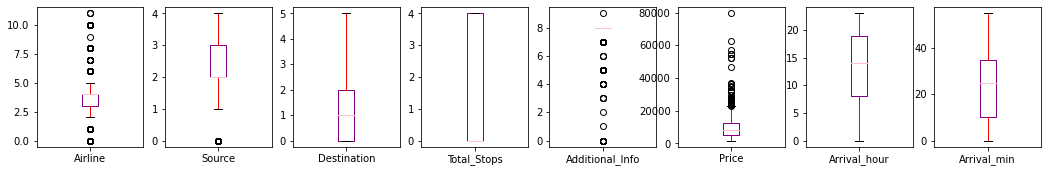

In [52]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df_train.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

the above plot shows the presence of outliers in the datset but removing the outliers we may loose inportant info.

<AxesSubplot:>

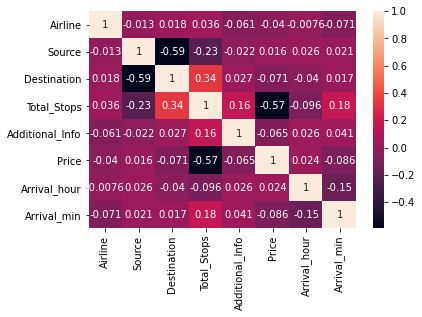

In [54]:
sns.heatmap(df_train.corr(),annot=True)

From the above heatmap,
1. destination and total_stops are corelated to each other.
2. total stops are contributing negetivly in price.
3. source and destinations are negetivly related to each other.

In [169]:
df_train['Dur_m'].fillna(0,inplace=True)

we have created 2 columns from duration column so will be filling the missing values in durations minutes with 0

In [55]:
df_train.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,1.458248,7.392998,9087.214567,13.349186,24.690601
std,2.352090,1.177276,1.474845,1.806320,1.214254,4611.548810,6.859317,16.506808
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,23.000000,55.000000


From the above plot,
mean is less that 50% in almost every column we can say skewness is almost neglibile.
there is no major difference between 75% and max values we can say that outliers are not present.

In [170]:
df_train.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int32
Additional_Info     int32
Price               int64
Day                object
Month              object
Year               object
Dep_h              object
Dep_m              object
Arrival_hour        int64
Arrival_min         int64
Dur_h              object
Dur_m              object
dtype: object

In [171]:
df_train['Day']=df_train['Day'].astype(int)
df_train['Month']=df_train['Month'].astype(int)
df_train['Year']=df_train['Year'].astype(int)
df_train['Dep_h']=df_train['Dep_h'].astype(int)
df_train['Dep_m']=df_train['Dep_m'].astype(int)
df_train['Dur_h']=df_train['Dur_h'].astype(int)
df_train['Dur_m']=df_train['Dur_m'].astype(int)

As we have created different columns from existing columns to we need to convert all the columns into the numeric type.

In [172]:
df_train.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int32
Additional_Info    int32
Price              int64
Day                int32
Month              int32
Year               int32
Dep_h              int32
Dep_m              int32
Arrival_hour       int64
Arrival_min        int64
Dur_h              int32
Dur_m              int32
dtype: object

# Skewness and Outliers of train dataset

In [173]:
df_train.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
Day                0.118174
Month             -0.387409
Year               0.000000
Dep_h              0.112924
Dep_m              0.167234
Arrival_hour      -0.370146
Arrival_min        0.110945
Dur_h              0.851302
Dur_m             -0.090779
dtype: float64

we will be checking the skewness among the data and will be performing power transformation yeo-johnsons techique to remove skewness.

# Dividing the dataset into Independent(X) and Dependent variables

In [174]:
x=df_train.drop("Price",axis=1)   #input variables
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_h,Dep_m,Arrival_hour,Arrival_min,Dur_h,Dur_m
0,3,0,5,4,8,24,3,2019,22,20,1,10,2,50
1,1,3,0,1,8,1,5,2019,5,50,13,15,7,25
2,4,2,1,1,8,9,6,2019,9,25,4,25,19,0
3,3,3,0,0,8,12,5,2019,18,5,23,30,5,25
4,3,0,5,0,8,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,9,4,2019,19,55,22,25,2,30
10679,1,3,0,4,8,27,4,2019,20,45,23,20,2,35
10680,4,0,2,4,8,27,4,2019,8,20,11,20,3,0
10681,10,0,5,4,8,1,3,2019,11,30,14,10,2,40


In [175]:
y=df_train['Price']  #output variables.
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

# VIF FACTOR (train dataset)

In [176]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [177]:
cal_vif(x)

,variables,VIF FACTOR
0,Airline,1.051544
1,Source,1.582729
2,Destination,1.940623
3,Total_Stops,1.794630
4,Additional_Info,1.057190
5,Day,1.011182
6,Month,1.201680
7,Year,115.001199
8,Dep_h,1.021304
9,Dep_m,1.035472


we will be checking the VIF factor to remove multicolinearties among the columns. In our dataset we will see that there are no multicollinearites exists.

# Removing skewness and Standard Scaling of train dataset

In [178]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[-0.29567552, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17618699,  1.2003668 ],
       [-1.4204747 ,  0.90201529, -1.37047751, ..., -0.43301039,
        -0.05523585, -0.09992072],
       [ 0.14759112, -0.01209588,  0.00585891, ...,  0.15684039,
         1.07475723, -1.87775484],
       ...,
       [ 0.14759112, -1.59965221,  0.70701885, ..., -0.12567658,
        -0.85650127, -1.87775484],
       [ 2.12296151, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17618699,  0.70427371],
       [-1.4204747 , -0.01209588,  0.00585891, ..., -0.43301039,
         0.08540529, -0.39108812]])

In [179]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #bringing all the columns on smae scale.
x=mn.fit_transform(x)
x

array([[-0.29567552, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17618699,  1.2003668 ],
       [-1.4204747 ,  0.90201529, -1.37047751, ..., -0.43301039,
        -0.05523585, -0.09992072],
       [ 0.14759112, -0.01209588,  0.00585891, ...,  0.15684039,
         1.07475723, -1.87775484],
       ...,
       [ 0.14759112, -1.59965221,  0.70701885, ..., -0.12567658,
        -0.85650127, -1.87775484],
       [ 2.12296151, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17618699,  0.70427371],
       [-1.4204747 , -0.01209588,  0.00585891, ..., -0.43301039,
         0.08540529, -0.39108812]])

# Performing Algorithms

In [180]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [181]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  14860700.2 at random state 94


In [182]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=94)

# Linear Regression

In [183]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))
print("rsme",np.sqrt(mse))

Cofficient is: [ 3.08727446e+02 -1.07548810e+02  3.92640809e+02 -7.12181106e+02
  4.63137531e+02 -6.33336958e+02 -3.87936852e+02  2.27373675e-13
  1.77461975e+02 -5.80028883e+01 -9.71369911e+01 -2.26643149e+01
  2.50966606e+03 -8.18746867e+01]
Intercept is:  9075.165355244202
Score is:  44.87475313858318
Mean Squared Error is:  14860700.2
Mean Absolute Error is:  2479.22
R2 Score is:  0.39
rsme 3854.9578725654433


# KNeighbors Regressor

In [184]:
knr=KNeighborsRegressor()
knr.fit(x_train1,y_train1)
sw=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.849481644304683
Mean Squared Error is: 7092806.77
Mean Absolute Error is: 1258.85
R2 Score is: 0.71
RSME 2663.232391860425


# Lasso

In [185]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [ 308.72627349 -107.54834635  392.63969161 -712.18062391  463.1360648
 -633.33595987 -387.93590126    0.          177.46058633  -58.00208764
  -97.1355714   -22.66330381 2509.66475293  -81.87395314]
Intercept is:  9075.165331533117
Score is:  0.44874753138516277
Mean Squared Error is: 14860701.49
Mean Absolute Error is: 2479.22
R2 Score is: 0.39
RSME 3854.958039679484


# Ridge

In [186]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train1,y_train1)
sw1=lt1.score(x_train1,y_train1)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
print("Score is: ",sw1)
pred=lt1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [ 308.72730074 -107.54890731  392.64059158 -712.18134355  463.13740226
 -633.33687401 -387.93681873    0.          177.46191678  -58.00287791
  -97.1369756   -22.66433048 2509.66545908  -81.87473331]
Intercept is:  9075.165354341952
Score is:  0.44874753138582113
Mean Squared Error is: 14860700.3
Mean Absolute Error is: 2479.22
R2 Score is: 0.39
RSME 3854.957886045654


# Support Vector Regressor

In [187]:
ker=["rbf","poly","linear"]    #finding the best kernel
for i in ker:
    svr=SVR(kernel=i)
    svr.fit(x_train1,y_train1)
    pred=svr.predict(x_test1)
    print("For",i,"Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
    print("For",i,"Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
    print("For",i,"R2 Score is:",round(r2_score(y_test1,pred),2))
    print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

For rbf Mean Squared Error is: 24130573.25
For rbf Mean Absolute Error is: 3557.14
For rbf R2 Score is: 0.01
RSME 4912.287985572932
For poly Mean Squared Error is: 24114526.74
For poly Mean Absolute Error is: 3555.72
For poly R2 Score is: 0.01
RSME 4910.654410578422
For linear Mean Squared Error is: 16594215.23
For linear Mean Absolute Error is: 2532.94
For linear R2 Score is: 0.32
RSME 4073.5997877503146


# Decision Tree Regressor

In [188]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train1,y_train1)
sw1=dtr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))


Score is:  0.9964865273119474
Mean Squared Error is: 5608305.17
Mean Absolute Error is: 823.08
R2 Score is: 0.77
RSME 2368.1860512149574


# Cross validation score

In [189]:
def rmse_cv(model,x_train1,y_train1):
    mse_cv_score=-cross_val_score(model,x_train1,y_train1,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_score).mean()
    return(rmse_cv)

In [190]:
rmse_cv(lr,x_train1,y_train1)   #linear regression

3316.9683404385987

In [191]:
rmse_cv(dtr,x_train1,y_train1) #decision tree regressor

2164.6032759212685

In [192]:
rmse_cv(lt1,x_train1,y_train1) #lasso

3316.9683390442033

In [193]:
rmse_cv(ls1,x_train1,y_train1)  #ridge

3316.968338952013

In [194]:
rmse_cv(knr,x_train1,y_train1)  #kneighbors regressor

2267.5683806940933

Comparing the results of RMSE with the corss val results we could see that Decision tree regressor is giving us the best results with the least rmse and differnce between cross val results and actual results are less.

# Hyper Parameter Tuning Using Grid Serach CV

In [203]:
parameter={"criterion":['squared_error','friedman_mse','absolute_error','poisson'],
           "splitter":['best','random'],
          "max_features":["auto","log2","sqrt"],
          "random_state":np.arange(2,20),
          "min_samples_leaf":np.arange(2,20)}

In [205]:
gcv=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [206]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'splitter': ['best', 'random']})

In [207]:
gcv.best_params_ 

{'criterion': 'friedman_mse',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'random_state': 18,
 'splitter': 'random'}

# Final Model

In [209]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto',min_samples_leaf=2,random_state=18,splitter='random')
dtr.fit(x_train1,y_train1)
sw1=dtr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))


Score is:  0.9566550433098108
Mean Squared Error is: 4169154.92
Mean Absolute Error is: 859.53
R2 Score is: 0.83
RSME 2041.8508574900695


# Passing the test dataset

In [200]:
w=dtr.predict(x1)  #passing the test dataset to our final model for predicting the flight price
w

array([ 5192.33333333,  7662.        , 13882.        , ...,
        7229.        , 12649.        , 11753.        ])

In [201]:
y1=pd.DataFrame({})  #saving it in a dataframe.
y1['Sales']=w

In [202]:
y1

,Sales
0,5192.333333
1,7662.000000
2,13882.000000
3,6218.000000
4,18308.000000
...,...
10677,4107.000000
10678,4145.000000
10679,7229.000000
10680,12649.000000


In [211]:
y1.to_csv('sales.csv')  #saving in a csv format.

# Saving the model

In [210]:
import joblib
joblib.dump(dtr,"flightprice.pkl")

['flightprice.pkl']